# IMB Alltoallv performance comparison

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,4)
import seaborn as sns
sns.set_style("white", {"font.family": "serif"})

In [2]:
import sys
sys.path.append('../../../python-modules')

In [3]:
from utilities import filemanip

In [4]:
from synthanalysis import imb

In [5]:
benchmark = "Alltoallv"
systems = ['ARCHER_CrayMPICH774',
           'ARCHER2_CrayMPICH8015',
           'Cirrus_IMPI18',
           'Cirrus_MPT218',
           'Fulhame_OMPI4',
           'Fulhame_MVAPICH231',
           'Fulhame_HMPT220',
           'Isambard_CrayMPICH776',
           'Tesseract_IMPI181',
           'Peta4-Skylake_IMPI193',
           'Athena_IMPI182']
nodelist = [1, 2, 4, 8, 16, 32]
imb_perf = []
for system in systems:
    tdict = {}
    for nodes in nodelist:
        stem = 'IMB_{0}_{1}nodes'.format(benchmark, nodes)
        imbfiles = filemanip.get_filelist('../results/' + system, stem)
        if len(imbfiles) > 0:
            tlist = imb.get_perf_dict(imbfiles[0], nodes, system)
            imb_perf.extend(tlist)
imb_df = pd.DataFrame(imb_perf)
imb.get_perf_stats(imb_df)

                                                    Perf              \
                                                     min      median   
System                Nodes Processes Size                             
ARCHER2_CrayMPICH8015 1     128       0             1.52        1.52   
                                      1           206.84      206.84   
                                      2           207.43      207.43   
                                      4           209.91      209.91   
                                      8           211.52      211.52   
...                                                  ...         ...   
Tesseract_IMPI181     32    768       32768    125675.63   125675.63   
                                      65536    236823.35   236823.35   
                                      131072   474171.02   474171.02   
                                      262144   963637.53   963637.53   
                                      524288  1955378.17  195537

/home/jovyan/work/synth/IMB/analysis/../../../python-modules/synthanalysis/imb.py:41: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_num = df.drop(['File', 'Date'], 1)


/home/jovyan/work/synth/IMB/analysis/../../../python-modules/synthanalysis/imb.py:47: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_num = df.drop(['File', 'Date'], 1)


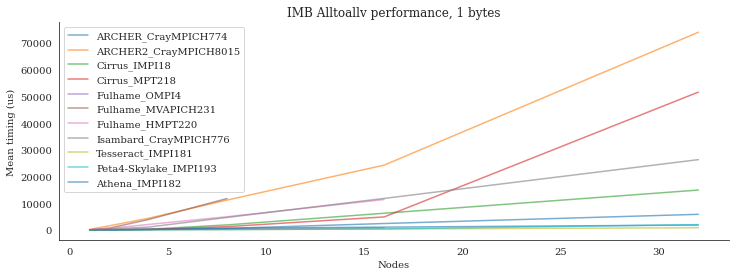

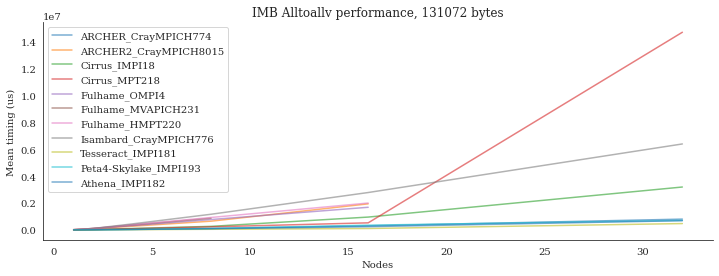

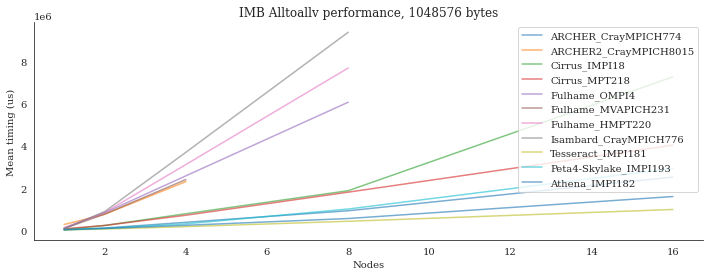

In [6]:
sizelist = [1, 131072, 1048576]
# Plot performance
for size in sizelist:
    plt.clf()
    for system in systems:
        nodes, perf = imb.get_node_scaling_df(imb_df, system, size, 'max')
        plt.plot(nodes, perf, label=f'{system}', alpha=0.6)
    sns.despine()
    plt.xlabel("Nodes")
    plt.ylabel("Mean timing (us)")
    plt.title(f'IMB {benchmark} performance, {size} bytes')
    plt.legend(loc='best')
    plt.show()
    

/home/jovyan/work/synth/IMB/analysis/../../../python-modules/synthanalysis/imb.py:61: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_num = df.drop(['File', 'Date'], 1)


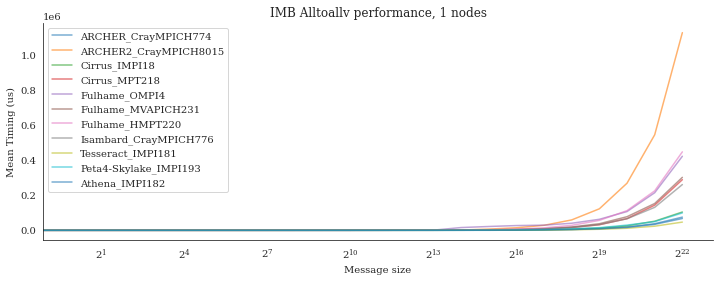

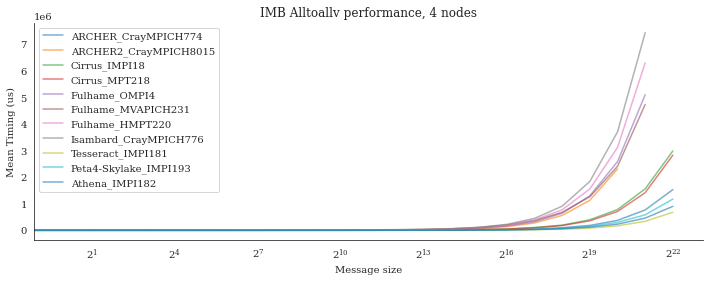

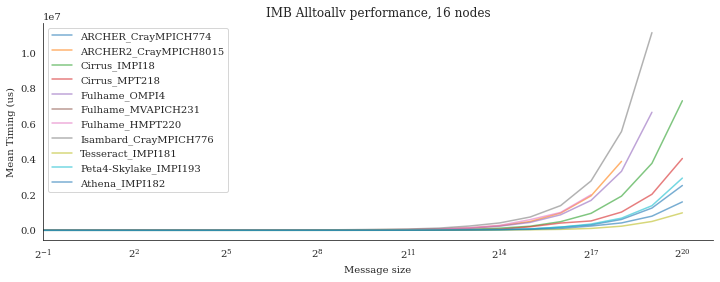

In [7]:
nodelist = [1, 4, 16]
# Plot performance
for node in nodelist:
    plt.clf()
    for system in systems:
        sizes, perf = imb.get_size_scaling_df(imb_df, system, node, 'max')
        plt.plot(sizes, perf, label=f'{system}', alpha=0.6)
    sns.despine()
    plt.xscale('log', base=2)
    plt.xlabel("Message size")
    plt.ylabel("Mean Timing (us)")
    plt.title(f'IMB {benchmark} performance, {node} nodes')
    plt.legend(loc='best')
    plt.show()

In [8]:
# Compute performance ratio
imb.get_perf_ratio(imb_df, 'ARCHER_CrayMPICH774', systems, 'max', invert=True)

ARCHER_CrayMPICH774 performance ratio to ARCHER_CrayMPICH774 performance
            #nodes
      #bytes         1         2         4         8        16        32
           0     1.000     1.000     1.000     1.000     1.000     1.000
           1     1.000     1.000     1.000     1.000     1.000     1.000
           2     1.000     1.000     1.000     1.000     1.000     1.000
           4     1.000     1.000     1.000     1.000     1.000     1.000
           8     1.000     1.000     1.000     1.000     1.000     1.000
          16     1.000     1.000     1.000     1.000     1.000     1.000
          32     1.000     1.000     1.000     1.000     1.000     1.000
          64     1.000     1.000     1.000     1.000     1.000     1.000
         128     1.000     1.000     1.000     1.000     1.000     1.000
         256     1.000     1.000     1.000     1.000     1.000     1.000
         512     1.000     1.000     1.000     1.000     1.000     1.000
        1024     1.000     1.000

       32768     0.005     0.112     0.134     0.118     0.165
       65536     0.029     0.113     0.138     0.126     0.206
      131072     0.081     0.117     0.141     0.133     0.182
      262144     0.117     0.120     0.153     0.152     0.184
      524288     0.150     0.121     0.142     0.145     0.188
     1048576     0.176     0.123     0.145     0.152
     2097152     0.176     0.123     0.150
     4194304     0.178     0.125
Fulhame_MVAPICH231 performance ratio to ARCHER_CrayMPICH774 performance
            #nodes
      #bytes         1         2         4         8        16        32
           0     0.012     0.006     0.003     0.002
           1     0.326     0.116     0.078     0.056
           2     0.330     0.114     0.078     0.044
           4     0.334     0.109     0.076     0.054
           8     0.335     0.112     0.076     0.044
          16     0.333     0.100     0.067     0.050
          32     0.327     0.092     0.076     0.043
          64     0.37

      131072     0.540     1.093     1.277     0.900     0.867     1.132
      262144     0.529     1.114     1.352     0.993     0.893     1.005
      524288     0.632     1.106     1.230     0.849     0.904     1.104
     1048576     0.633     1.126     1.247     0.918     0.859
     2097152     0.762     1.046     1.316     1.347
     4194304     0.758     1.074     1.303
Athena_IMPI182 performance ratio to ARCHER_CrayMPICH774 performance
            #nodes
      #bytes         1         2         4         8        16        32
           0     0.942     4.905    10.117    11.174    11.991     9.853
           1     0.919     1.778     2.610     1.124     0.440     0.315
           2     0.916     1.747     2.386     0.968     0.427     0.320
           4     0.914     1.696     2.686     1.171     0.405     0.338
           8     0.912     1.730     2.758     1.096     0.452     0.264
          16     0.910     1.717     2.366     1.132     0.448     0.328
          32     0.890  